- MNIST
- Dataloader, Transformation
- Multilayer Neural Net, activation function
- Loss and Optimizer
- Training loop (batch training)
- Model evaluation
- GPU support

In [33]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# hyperparameters
input_size = 784  # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


In [10]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor())

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([100, 1, 28, 28]) torch.Size([100])
tensor([3, 2, 5, 4, 0, 9])


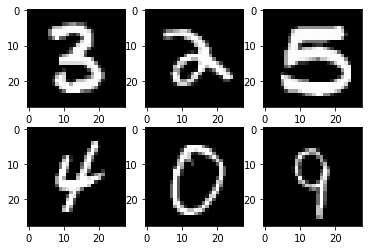

In [25]:
examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)
print(labels[:6])

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [14]:
class NeuralNet(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(in_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim, n_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
        

In [27]:
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [56]:
# Num of parameters to train
sum(p.numel() for p in model.parameters() if p.requires_grad)

79510

In [51]:
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [52]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # lets reshape images as shape is 100,1,28,28 -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, steps {i+1}/{n_total_steps}: loss={loss.item():.4f}')

epoch 1/2, steps 100/600: loss=0.4599
epoch 1/2, steps 200/600: loss=0.4033
epoch 1/2, steps 300/600: loss=0.1682
epoch 1/2, steps 400/600: loss=0.1997
epoch 1/2, steps 500/600: loss=0.2709
epoch 1/2, steps 600/600: loss=0.2419
epoch 2/2, steps 100/600: loss=0.2979
epoch 2/2, steps 200/600: loss=0.2035
epoch 2/2, steps 300/600: loss=0.1390
epoch 2/2, steps 400/600: loss=0.1215
epoch 2/2, steps 500/600: loss=0.1457
epoch 2/2, steps 600/600: loss=0.1275


In [53]:
# testing loop
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device) 
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.16
